<br><font face="Times New Roman" size=5><div dir=ltr align=center>
<font color=blue size=8>
    Introduction to Machine Learning <br>
<font color=red size=5>
    Sharif University of Technology - Computer Engineering Department <br>
    Fall 2022<br> <br>
<font color=black size=6>
    Homework 2: Practical - SVM
    <br>
<font color=black size=4>
    Alireza Gargoori Motlagh, Alireza Heidari
    
<br><br>
<font size=4>
   **Name**: Amirreza Bagheri Delouee<br>
   **Student ID**: 98109804<br> <br>
In this homework, we are going to implement the algorithms from the second and third chapters of the course, so reading the notebooks of these chapters would be quite useful. Also, we are going to evaulate and compare our models by the metrics defined in chapter 3. Keep in mind to complete all of the following questions and write your own codes in the TODO parts.

## <font face="Times New Roman" size=4><div dir=ltr>
## Problem 3: Face Classification by SVM on Eigenfaces (150 points)
In the following problem, we are going to build a classifier to distinguish the faces of 40 people on a toy dataset. The dataset includes 400 pictures of 40 people faces, each by a 64*64 pixel picture. Use the following cell to download the dataset:

In [39]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

faces = datasets.fetch_olivetti_faces()
print(faces.data.shape)
print(faces.images[0].shape)

(400, 4096)
(64, 64)


<font face="Times New Roman" size=4><div dir=ltr>
### Visualization of the Faces (5 points)
Plot an image of each class in one figure using subplots. (Note that the design matrix X is availabe in <code>faces.data</code> and the target values available in <code>faces.target</code> .)

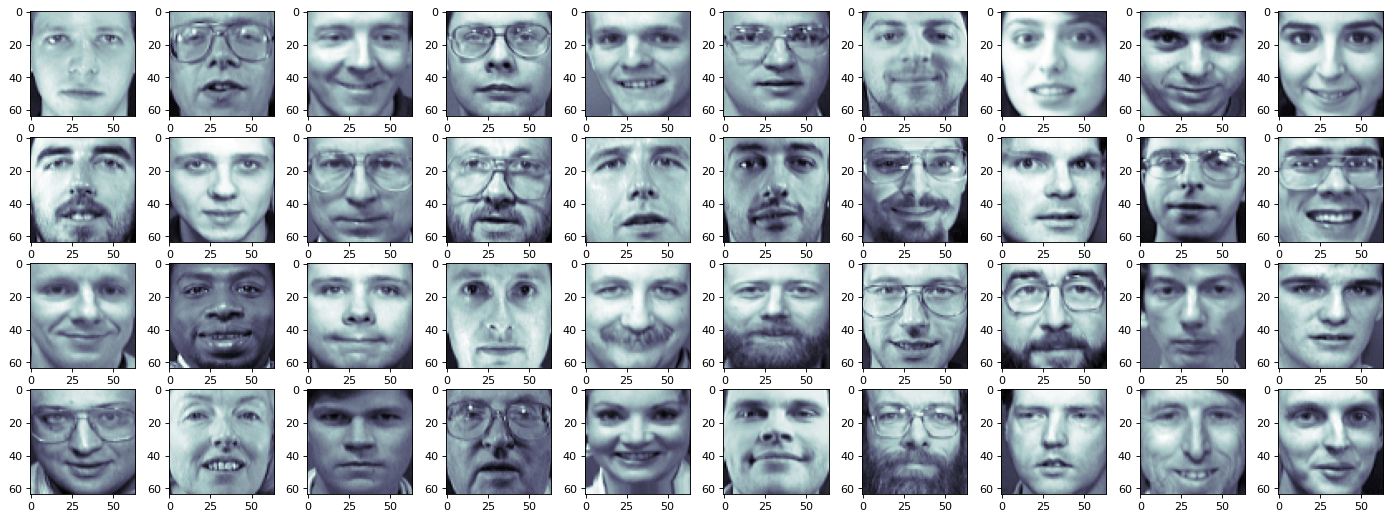

In [40]:
#TODO
fig = plt.figure(figsize=(22, 8), dpi=80)
for i in range(40):
    img_grid = fig.add_subplot(4, 10, i+1)
    img_grid.imshow(faces.images[i*10], cmap=plt.cm.bone)

<font face="Times New Roman" size=4><div dir=ltr>
### Train-Test Split (2 points)
Split the data into train and test sets and print the dimensions of each set. (70% for train and 30% for test)

In [41]:
#TODO
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, test_size=0.30)

print(f"X_train shape is {X_train.shape}")
print(f"X_test shape is {X_test.shape}")
print(f"y_train shape is {y_train.shape}")
print(f"y_test shape is {y_test.shape}")

X_train shape is (280, 4096)
X_test shape is (120, 4096)
y_train shape is (280,)
y_test shape is (120,)


<font face="Times New Roman" size=4><div dir=ltr>
### Dimensionality Reduction (18 points)
As you might have guessed, the number of featuers, i.e. pixels, is quite large and training a classifier might take a considerbale time. However, using a wise method to reduce the dimension of our data could decrease the cost of training the model. In the following cell use PCA (Principal Component Analysis) to reduce the dimension of the dataset. Choose an appropirate number of components in your PCA and explain your reason for your choice.

In [42]:
#TODO
from sklearn import decomposition

pca = decomposition.PCA(n_components=100, whiten=True)
pca.fit(X_train)

PCA(n_components=100, whiten=True)

<font face="Times New Roman" size=4><div dir=ltr>
Plot the scree plot of the proportion of the variance explained(PVE) vs principal components to determine the number of principal components for futher analysis.

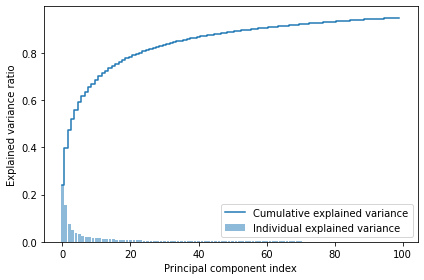

In [43]:
#TODO
pve = pca.explained_variance_ratio_
cumulative_pve = np.cumsum(pve)

plt.bar(range(0,len(pve)), pve, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cumulative_pve)), cumulative_pve, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [44]:
np.where(cumulative_pve>0.9)

(array([56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72,
        73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89,
        90, 91, 92, 93, 94, 95, 96, 97, 98, 99], dtype=int64),)

As can be seen from the figure and also cumulative pve, we need about 60 principal components to capture 90 percent of variance in data

In [45]:
pca = decomposition.PCA(n_components=60, whiten=True)
pca.fit(X_train)

PCA(n_components=60, whiten=True)

<font face="Times New Roman" size=4><div dir=ltr>
### Eigenfaces: Principal Components Visualization (25 points)
Plot the mean face using your PCA model with <code>pca.mean_</code> attribute followed by a reshape to original dimensions. What is this mean vector?

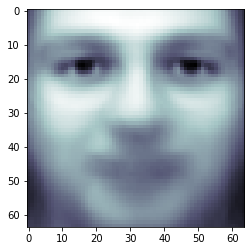

In [46]:
#TODO
plt.imshow(pca.mean_.reshape(faces.images[0].shape), cmap=plt.cm.bone)
plt.show()

<font face="Times New Roman" size=4><div dir=ltr>
Eigenfaces is the name given to a set of eigenvectors when used in the computer vision problem of human face recognition. Plot the 30 first eigenfaces sorted by their rank from the most important to the lowest. Can you explain what these faces indicate?

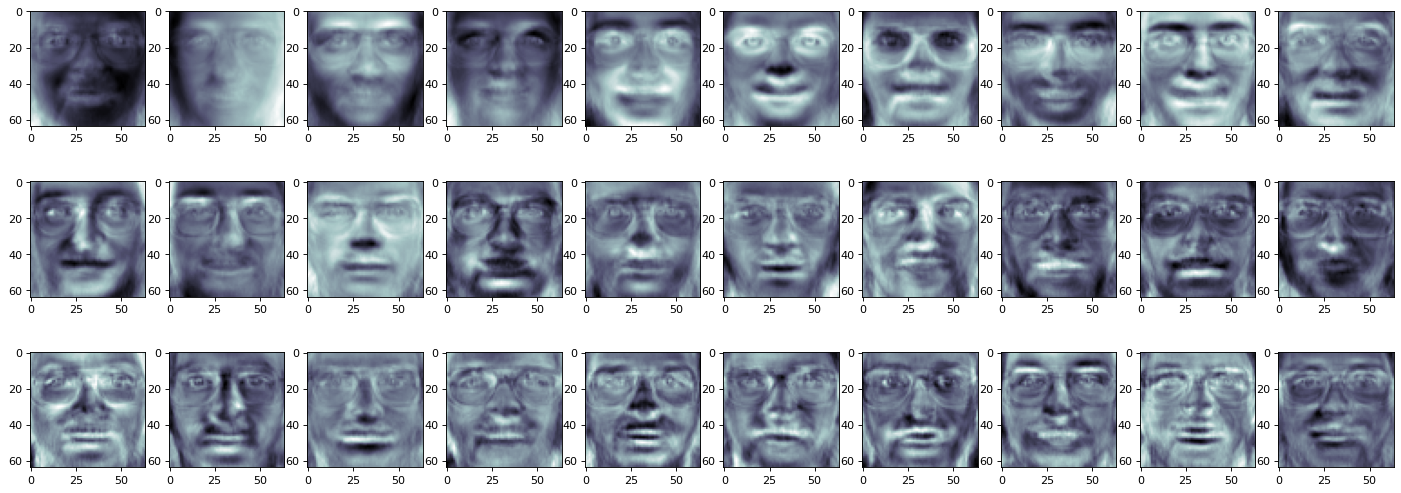

In [47]:
#TODO
fig = plt.figure(figsize=(22, 8), dpi=80)
for i in range(30):
    ax = fig.add_subplot(3, 10, i+1)
    ax.imshow(pca.components_[i].reshape(faces.images[0].shape), cmap=plt.cm.bone)

Different eigenfaces indicate different features of a picture. For example in the first 5 pictures, we see that lighting is the feature captured by the principal components. In the second row, we see that some parts of the face such as eyebrows, chins, nose, and lips are captured by the eigenfaces.

<font face="Times New Roman" size=4><div dir=ltr>
Transform your train and test sets to the new feature space using your PCA module. 

In [48]:
#TODO
X_train_new = pca.transform(X_train)
X_test_new = pca.transform(X_test)

<font face="Times New Roman" size=4><div dir=ltr>
### Training your SVM Classifier (50 points)
Train an SVM classifier on the transformed dataset in the new feature space. You should use Grid Search Cross Validation or other validation techniques to obtain the best hyperparameters for your classifier. 

In [49]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

#TODO
parameters = {'C': [0.1, 1, 10, 100, 1000], 
                'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 'auto'], 
                'degree': [1, 2, 3],
                'kernel': ['rbf', 'poly', 'linear', 'sigmoid']}
model = GridSearchCV(svm.SVC(), parameters, verbose=3)
model.fit(X_train_new, y_train)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits
[CV 1/5] END C=0.1, degree=1, gamma=1, kernel=rbf;, score=0.036 total time=   0.0s
[CV 2/5] END C=0.1, degree=1, gamma=1, kernel=rbf;, score=0.054 total time=   0.0s
[CV 3/5] END C=0.1, degree=1, gamma=1, kernel=rbf;, score=0.036 total time=   0.0s


c:\Users\Amirreza\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


[CV 4/5] END C=0.1, degree=1, gamma=1, kernel=rbf;, score=0.036 total time=   0.0s
[CV 5/5] END C=0.1, degree=1, gamma=1, kernel=rbf;, score=0.036 total time=   0.0s
[CV 1/5] END C=0.1, degree=1, gamma=1, kernel=poly;, score=0.946 total time=   0.0s
[CV 2/5] END C=0.1, degree=1, gamma=1, kernel=poly;, score=0.946 total time=   0.0s
[CV 3/5] END C=0.1, degree=1, gamma=1, kernel=poly;, score=0.929 total time=   0.0s
[CV 4/5] END C=0.1, degree=1, gamma=1, kernel=poly;, score=0.929 total time=   0.0s
[CV 5/5] END C=0.1, degree=1, gamma=1, kernel=poly;, score=0.946 total time=   0.0s
[CV 1/5] END C=0.1, degree=1, gamma=1, kernel=linear;, score=0.946 total time=   0.0s
[CV 2/5] END C=0.1, degree=1, gamma=1, kernel=linear;, score=0.946 total time=   0.0s
[CV 3/5] END C=0.1, degree=1, gamma=1, kernel=linear;, score=0.929 total time=   0.0s
[CV 4/5] END C=0.1, degree=1, gamma=1, kernel=linear;, score=0.929 total time=   0.0s
[CV 5/5] END C=0.1, degree=1, gamma=1, kernel=linear;, score=0.946 tot

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000], 'degree': [1, 2, 3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 'auto'],
                         'kernel': ['rbf', 'poly', 'linear', 'sigmoid']},
             verbose=3)

In [50]:
print(f"Best Parameters: {model.best_params_}")
print(f"Best Estimator: {model.best_estimator_}")
print(f"Best Accuracy: {model.best_score_}")

Best Parameters: {'C': 0.1, 'degree': 1, 'gamma': 1, 'kernel': 'poly'}
Best Estimator: SVC(C=0.1, degree=1, gamma=1, kernel='poly')
Best Accuracy: 0.9392857142857143


In [51]:
best_params = model.best_params_
clf = svm.SVC(C=best_params['C'], degree=best_params['degree'], gamma=best_params['gamma'],  kernel=best_params['kernel'], probability=True)
clf.fit(X_train_new, y_train)

SVC(C=0.1, degree=1, gamma=1, kernel='poly', probability=True)

<font face="Times New Roman" size=4><div dir=ltr>
After training your model, we can check its prediction on test samples. Run the following cell to check your model predictions with the target values on test samples. Predictions with red label indicate false classification of your model.

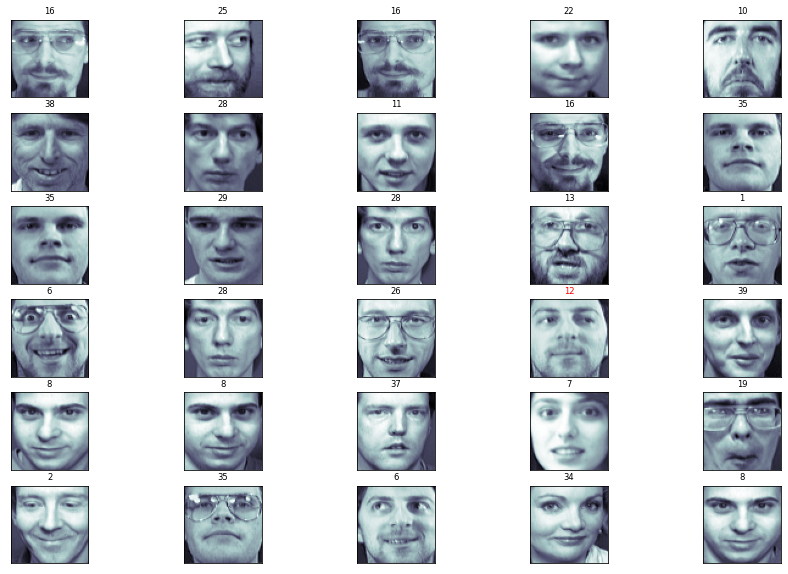

In [52]:
fig = plt.figure(figsize=(15, 10))
for i in range(30):
    ax = fig.add_subplot(6, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[i].reshape(faces.images[0].shape),
              cmap=plt.cm.bone)
    y_pred = clf.predict(X_test_new[i, np.newaxis])[0] #X_test_new is the transformed X_test after PCA.
    color = ('black' if y_pred == y_test[i] else 'red')
    ax.set_title(y_pred, fontsize='small', color=color)

<font face="Times New Roman" size=4><div dir=ltr>
## Performance Measures
Let's evaluate your classifier to find out how good your model is.
    
    
### Precision Recall Tradeoff (20 points)
Plot the precision and recall versus the decision threshold figure and precision vs recall figure.

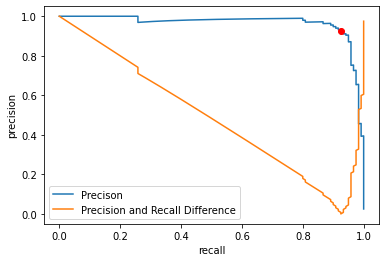

In [53]:
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize

#TODO
n_classes = len(set(y_train))
y_test_bin = label_binarize(y_test, classes=[*range(n_classes)])
y_score_svm = clf.predict_proba(X_test_new)
precision, recall, threshold = {}, {}, {}
precision['micro'], recall['micro'], threshold['micro'] = precision_recall_curve(y_test_bin.ravel(), y_score_svm.ravel())

plt.plot(recall['micro'], precision['micro'], label='Precison')
plt.plot(recall['micro'], np.abs(precision['micro'] - recall['micro']), label='Precision and Recall Difference')
index_equal = np.argmin(np.abs(recall['micro'] - precision['micro']))
plt.plot(recall['micro'][index_equal], precision['micro'][index_equal], 'ro')
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend()
plt.show()

In [54]:
index_equal = np.argmin(np.abs(recall['micro'] - precision['micro']))
print(f"{recall['micro'][index_equal]: 0.5f}, {precision['micro'][index_equal]: 0.5f}")

 0.92500,  0.92500


<font face="Times New Roman" size=4><div dir=ltr>
Then find the decision threshold, where the recall is equal to the precision. Write down it in the below cell:
    <br>
note: it should be apparent in the above figures.

decision_threshold = ?

recall at the above threshold = 0.92500

<font face="Times New Roman" size=4><div dir=ltr>
### ROC/AUC (10 points)
Train a RandomForestClassifier with 30 estimators then plot a ROC curve, and calculate AUC for both randomForsetClassifier and your SVM classifier that you trained earlier, which one is the best by considering AUC indicator?


In [55]:
from sklearn.ensemble import RandomForestClassifier
#TODO: Train the random forest on the data
clf_forest = RandomForestClassifier(n_estimators=30)
clf_forest.fit(X_train_new, y_train)

RandomForestClassifier(n_estimators=30)

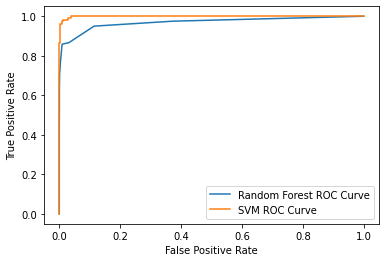

In [56]:
from sklearn.metrics import roc_curve, roc_auc_score
#TODO: plot roc_curve and print roc_auc_score for svm and random forest classifiers
n_classes = len(set(y_train))
y_test_bin = label_binarize(y_test, classes=[*range(n_classes)])
y_score_forest = clf_forest.predict_proba(X_test_new)
fpr_forest, tpr_forest, threshold = {}, {}, {}
fpr_svm, tpr_svm = {}, {}
fpr_forest['micro'], tpr_forest['micro'], threshold['micro'] = roc_curve(y_test_bin.ravel(), y_score_forest.ravel())
fpr_svm['micro'], tpr_svm['micro'], threshold['micro'] = roc_curve(y_test_bin.ravel(), y_score_svm.ravel())

plt.plot(fpr_forest['micro'], tpr_forest['micro'], label="Random Forest ROC Curve")
plt.plot(fpr_svm['micro'], tpr_svm['micro'], label="SVM ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [57]:
svm_score = roc_auc_score(y_test_bin, clf.predict_proba(X_test_new), average='micro')
rfc_score = roc_auc_score(y_test_bin, clf_forest.predict_proba(X_test_new), average='micro')
print(f"SVM AUC Score: {svm_score}")
print(f"RFC AUC Score: {rfc_score}")

SVM AUC Score: 0.9988532763532764
RFC AUC Score: 0.969647435897436


Considering AUC score, SVM is a better model than Random Forest Classifier

<font face="Times New Roman" size=4><div dir=ltr>
### Classification Report (5 points)
Use the <code>classification_report</code> to describe the performance of your SVM model with different metrics. Explain your results and compare the predictions of model on different classes in few sentences.

In [58]:
from sklearn.metrics import classification_report

#TODO
y_pred_svm = clf.predict(X_test_new)
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         3
           2       0.50      1.00      0.67         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         4
           6       1.00      0.75      0.86         4
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         4
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         6
          11       1.00      1.00      1.00         2
          12       0.67      1.00      0.80         2
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00         4
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         4
          17       1.00      1.00      1.00         1
          18       1.00    

We can see that overall, our model performs very good on test data and has macro average precision, recall, and f1-score of above 95 percent. However, our model has low precision for classes which have lower number of instances and has higher precision for classes with higher number of instances.

<font face="Times New Roman" size=4><div dir=ltr>
### Confusion Matrix (15 points)
Plot the confusion matrix of the classifier's predictions.
Let’s focus on the errors of the plot. Divide each value in the confusion matrix by the number of images in the corresponding class so that you can compare error rates instead of absolute number of errors, then plot the result.

In [59]:
# TODO: calculate conf_mx then print it
n = 40
conf_mx = np.zeros((n, n))
for i in range(len(y_test)):
    conf_mx[y_test[i]][y_pred_svm[i]] += 1

print(conf_mx)

[[4. 0. 0. ... 0. 0. 0.]
 [0. 3. 0. ... 0. 0. 0.]
 [0. 0. 2. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 4. 0. 0.]
 [0. 0. 0. ... 0. 4. 0.]
 [0. 0. 0. ... 0. 0. 3.]]


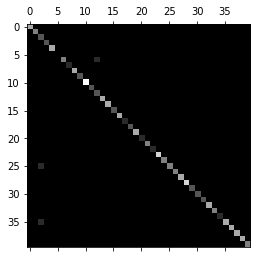

In [60]:
# TODO: after calculating confusion matrix, visualize it using below code

plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [61]:
# TODO: calculate norm_conf_mx then print it
norm_conf_mx = np.zeros((n, n))
for i in range(n):
    if (np.sum(conf_mx[i]) != 0):
        norm_conf_mx[i] = conf_mx[i]/(np.sum(conf_mx[i]))
print(norm_conf_mx)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


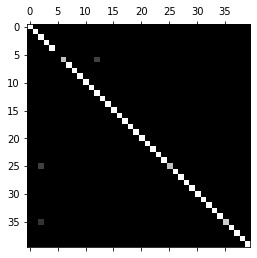

In [62]:
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()